# Idetifying Cat or Dog Image using CNN-Image Classification

In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [24]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [26]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [38]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [39]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


Class names: ['cats', 'dogs']


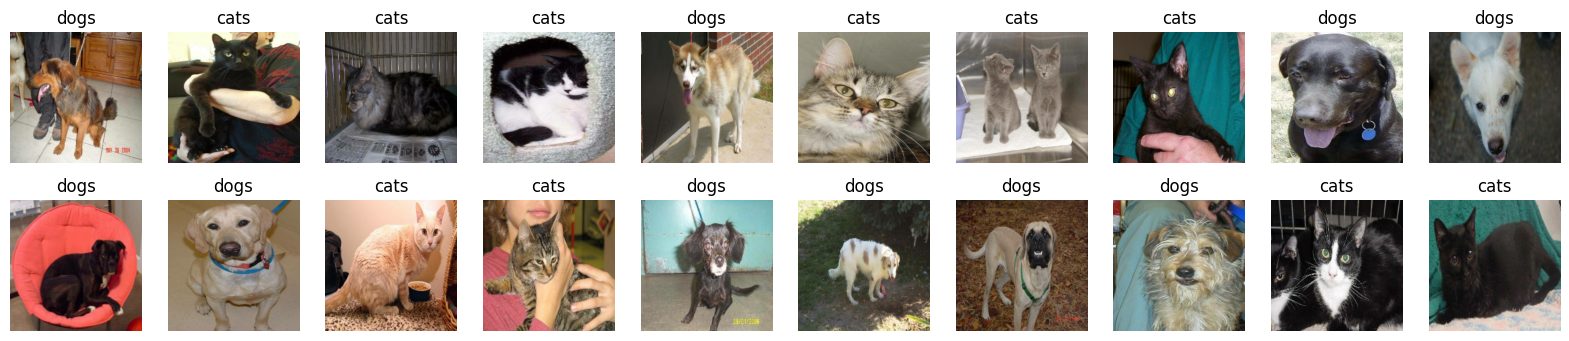

In [43]:
import matplotlib.pyplot as plt
import os

# Manually specify the class names based on the directory structure
class_names = sorted(os.listdir('/content/dogs_vs_cats/test'))
print("Class names:", class_names)

# Number of images to display per class
images_per_class = 10

# Set the figure size (adjust this based on the number of classes and images per class)
plt.figure(figsize=(images_per_class * 2, len(class_names) * 2))

# Initialize a dictionary to track how many images have been plotted per class
img_count = {class_name: 0 for class_name in class_names}

# Iterate through the dataset
for images, labels in train_ds:
    for i in range(len(images)):
        label_index = labels[i].numpy()  # Convert label tensor to numpy index
        label_name = class_names[label_index]  # Get class name
        if img_count[label_name] < images_per_class:
            plt.subplot(len(class_names), images_per_class, sum(img_count.values()) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(label_name)
            plt.axis("off")
            img_count[label_name] += 1
        if all(count >= images_per_class for count in img_count.values()):
            break
    if all(count >= images_per_class for count in img_count.values()):
        break

plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Adjust spacing between images
plt.show()


In [44]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [45]:
# CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 287ms/step - accuracy: 0.5611 - loss: 4.2317 - val_accuracy: 0.5410 - val_loss: 2.5358
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 72s 248ms/step - accuracy: 0.5782 - loss: 1.1730 - val_accuracy: 0.5530 - val_loss: 0.7894
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 332ms/step - accuracy: 0.6255 - loss: 0.6865 - val_accuracy: 0.5368 - val_loss: 0.8141
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 332ms/step - accuracy: 0.6780 - loss: 0.6169 - val_accuracy: 0.6296 - val_loss: 0.6592
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 249ms/step - accuracy: 0.7495 - loss: 0.5332 - val_accuracy: 0.6859 - val_loss: 0.5989
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 247ms/step - accuracy: 0.7572 - loss: 0.5245 - val_accuracy: 0.7342 - val_loss: 0.5261
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 245ms/step - accuracy: 0.8006 - loss: 0.4339 - val_accuracy: 0.7329 - val_loss: 0.5488
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 247ms/step - accuracy: 0.8046 - loss: 0

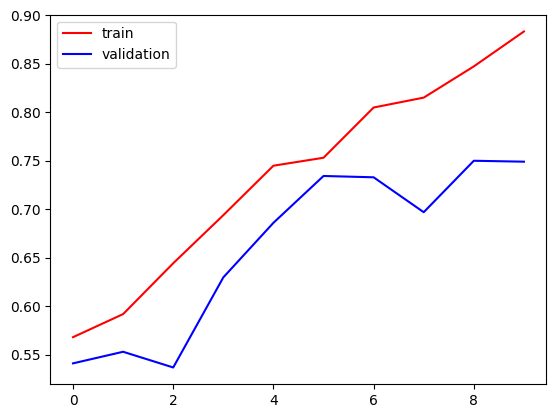

In [49]:
 plt.plot(history.history['accuracy'], color='red', label='train')
 plt.plot(history.history['val_accuracy'], color='blue', label='validation')
 plt.legend()
 plt.show()

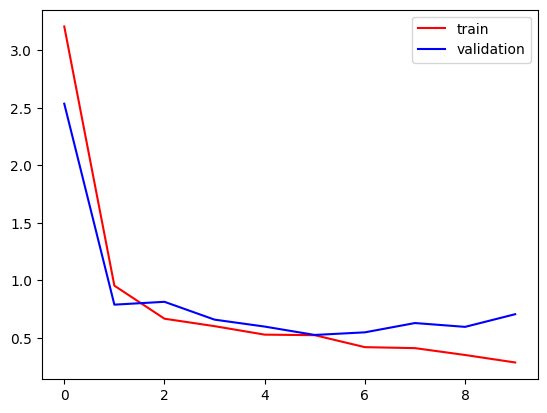

In [50]:
 plt.plot(history.history['loss'], color='red', label='train')
 plt.plot(history.history['val_loss'], color='blue', label='validation')
 plt.legend()
 plt.show()

In [51]:
print('Test Accuracy is', model.evaluate(validation_ds)[1]*100, '%')

625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.7453 - loss: 0.7123
Test Accuracy is 74.89500045776367 %
